# Data Features:

Age ==>> Age in years

Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

Sibsp ==>> NO of siblings / spouses aboard the Titanic
The dataset defines family relations in this way...

a. Sibling = brother, sister, stepbrother, stepsister

b. Spouse = husband, wife (mistresses and fiancés were ignored)

Parch ==>> The dataset defines family relations in this way...

a. Parent = mother, father

b. Child = daughter, son, stepdaughter, stepson

c. Some children travelled only with a nanny, therefore parch=0 for them.

Pclass ==>> A proxy for socio-economic status (SES)

1st = Upper
2nd = Middle
3rd = Lower
Embarked ==>> Port of Embarkation
C = Cherbourg, Q = Queenstown, S = Southampton

Name ==>> Passenger Name

Sex ==>> Sex
Ticket ==>> Ticket number
Cabin ==>> Cabin number
Fare ==>> Indicating the fare paid
PassengerID ==>> Passenger ID
Survival ==>> Survival 0 = No, 1 = Yes

# Importing the Libraries

In [296]:
# Data analysis and wrangling
import pandas as pd
import numpy as np

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sn

import warnings
warnings.filterwarnings('ignore')

In [202]:
pd.set_option('display.max_rows',None)

# Loading of the data

In [203]:
data1=pd.read_csv('titanic.csv')
#data1=pd.DataFrame(data1)
data1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.00,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,237736,30.0708,NaN,C


# checking the dimensionality

In [204]:
data1.shape

(891, 12)

##### Observation:

    Our dataset has 891 rows and 12 columns.

# Stats summary

In [205]:
data1.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


##### Observation:

    From the count, we see that 'Age' column has missing data.
    
    Mean value > Median = 'Fare', i.e. the data in 'Fare' is right skewed.

# Checking null values in the dataframe

In [206]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


##### Observation:

        The 'Age','Cabin' and 'Embarked' column has null values, which will be handled during univariate analysis.

# Checking the datatypes of columns:

In [207]:
data1.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

##### Observation:

        There is a combination of datatypes present in the data : int, float and object.
        
        Categorical features : Survived,Sex, Embarked
        
        Ordinal features: Pclass
        
        Continuous features: Age, Fare
        
        Discrete features: SibSp, Parch
        
        The target variable in our dataset in 'Survived' and rest 11 features are independent features.

In [208]:
#check duplicate rows
dup_data1=data1[data1.duplicated()]
dup_data1.shape

(0, 12)

There are no duplicate rows present in the dataframe.

# Univariate Analysis of features

In [209]:
list_cols=data1.columns

In [210]:
list_cols[0]

'PassengerId'

### 1.'PassengerId' 

In [211]:
data1['PassengerId'].dtypes

dtype('int64')

In [212]:
data1['PassengerId']

0        1
1        2
2        3
3        4
4        5
5        6
6        7
7        8
8        9
9       10
10      11
11      12
12      13
13      14
14      15
15      16
16      17
17      18
18      19
19      20
20      21
21      22
22      23
23      24
24      25
25      26
26      27
27      28
28      29
29      30
30      31
31      32
32      33
33      34
34      35
35      36
36      37
37      38
38      39
39      40
40      41
41      42
42      43
43      44
44      45
45      46
46      47
47      48
48      49
49      50
50      51
51      52
52      53
53      54
54      55
55      56
56      57
57      58
58      59
59      60
60      61
61      62
62      63
63      64
64      65
65      66
66      67
67      68
68      69
69      70
70      71
71      72
72      73
73      74
74      75
75      76
76      77
77      78
78      79
79      80
80      81
81      82
82      83
83      84
84      85
85      86
86      87
87      88
88      89
89      90
90      91

##### Observation:

        This feature has no impact on outcome variable, so it will be excluded from analysis.

In [213]:
list_cols[1]

'Survived'

### 2.'Survived'

It is our target variable.

In [214]:
data1['Survived'].dtype

dtype('int64')

In [215]:
data1['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

##### Observation:

    62% of the people died because of the sinking of the Titanic and 38% of them survived.

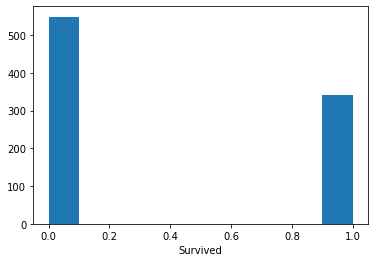

In [216]:
plt.hist(x=data1['Survived'])
plt.xlabel('Survived')
plt.show()

##### Observation:

    'Survived' column is our target variable and we see from the data distribution of target variable that the dataset is not imbalanced.

In [217]:
list_cols[2]

'Pclass'

### 3.'Pclass'

It is a categorical variable with 3 values: 1 Class, 2 Class, 3 Class

In [218]:
data1['Pclass'].dtype

dtype('int64')

In [219]:
data1['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

##### Observation:

    We have 3 types of passenger class, i.e. 1 , 2 and 3.
    
    Majority of people travelled in 3rd class.

In [220]:
list_cols[3]

'Name'

### 4.'Name'

In [221]:
data1['Name'].dtype

dtype('O')

In [222]:
data1['Name'].value_counts()

Doling, Miss. Elsie                                                                   1
Heikkinen, Miss. Laina                                                                1
Harknett, Miss. Alice Phoebe                                                          1
Mallet, Mr. Albert                                                                    1
Goldsmith, Mr. Frank John                                                             1
Phillips, Miss. Kate Florence ("Mrs Kate Louise Phillips Marshall")                   1
Brown, Mr. Thomas William Solomon                                                     1
Johnson, Miss. Eleanor Ileen                                                          1
Risien, Mr. Samuel Beard                                                              1
Beckwith, Mr. Richard Leonard                                                         1
Chronopoulos, Mr. Apostolos                                                           1
Troupiansky, Mr. Moses Aaron    

##### Observation:

    The name values are as such of no use but we extract information from the same to generate any insights, if any.

In [223]:
list_cols[4]

'Sex'

### 5.'Sex'

'Sex' is a categorical feature with 2 categories: Male and Female

In [224]:
data1['Sex'].dtype

dtype('O')

In [225]:
data1['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

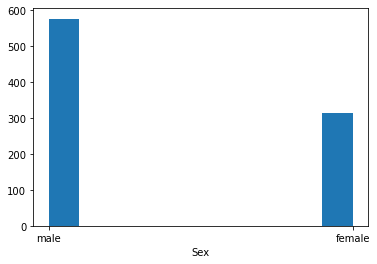

In [226]:
plt.hist(data1['Sex'])
plt.xlabel('Sex')
plt.show()

##### Observation:

    Titanic had more males than females as travellers.

In [227]:
list_cols[5]

'Age'

### 6.'Age'

Age is a numerical feature.

In [228]:
data1['Age'].dtype

dtype('float64')

In [229]:
print('The age of travellers ranges between ',data1['Age'].min()," and ",data1['Age'].max())

The age of travellers ranges between  0.42  and  80.0


In [230]:
list_cols[6]

'SibSp'

### 7.'SibSp'

This feature gives us the info of no. of siblings and spouses that travelled with a person.

In [231]:
data1['SibSp'].dtype

dtype('int64')

In [232]:
data1['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

##### Observation:

    Many of the passengers didnot have any sibling or spouse,i.e. most of the people were travelling alone.

In [233]:
list_cols[7]

'Parch'

### 8.'Parch'

In [234]:
data1['Parch'].dtype

dtype('int64')

In [235]:
data1['Parch'].isnull().sum()

0

In [236]:
data1['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

##### Observation:

    Many passengers were travelling alone as seen from the above info of parents and children.

In [237]:
list_cols[8]

'Ticket'

### 9.'Ticket'

Ticket no. is allocated to each person. Ticket is a mix of numeric and alphanumeric data types.

In [238]:
data1['Ticket'].dtype

dtype('O')

In [239]:
data1['Ticket'].value_counts()

1601                  7
CA. 2343              7
347082                7
3101295               6
CA 2144               6
347088                6
S.O.C. 14879          5
382652                5
113781                4
347077                4
PC 17757              4
113760                4
4133                  4
2666                  4
349909                4
19950                 4
17421                 4
LINE                  4
W./C. 6608            4
110413                3
371110                3
SC/Paris 2123         3
248727                3
C.A. 31921            3
13502                 3
363291                3
345773                3
347742                3
29106                 3
24160                 3
C.A. 34651            3
PC 17760              3
F.C.C. 13529          3
PC 17582              3
230080                3
PC 17755              3
35273                 3
110152                3
239853                3
PC 17572              3
PC 17608              2
PC 17477        

##### Observation:

    We see that the ticket numbers data is duplicated in some cases.

In [240]:
list_cols[9]

'Fare'

### 10. 'Fare'

This is a numerical feature, the feature gives us the amount paid by each passenger.

In [241]:
print("The travle fare ranges between ",data1['Fare'].min()," and ",data1['Fare'].max())

The travle fare ranges between  0.0  and  512.3292


##### Observation:

    The travel fare ranges between 0.0 and 512.3292.

In [242]:
list_cols[10]

'Cabin'

### 11.'Cabin'

Cabin numbers are stored in this feature.

In [243]:
data1['Cabin'].value_counts()

C23 C25 C27        4
B96 B98            4
G6                 4
C22 C26            3
D                  3
E101               3
F2                 3
F33                3
D36                2
C52                2
F G73              2
B49                2
B5                 2
B35                2
F4                 2
C2                 2
D20                2
E67                2
B18                2
C83                2
D33                2
D26                2
C125               2
C65                2
E121               2
B51 B53 B55        2
E44                2
E24                2
B58 B60            2
D35                2
E33                2
B77                2
B20                2
C123               2
C93                2
D17                2
C124               2
C92                2
C126               2
C78                2
E25                2
E8                 2
B57 B59 B63 B66    2
C68                2
B22                2
B28                2
A16                1
A36          

##### Observation:

    Some cabin numbers are repeated in the dataset as same cabin can be occupied by multiple people.
    
    The cabin values are alphanumeric

In [244]:
list_cols[11]

'Embarked'

### 12.'Embarked'

 Embarked is a categorical variables with 3 categries: C(Cherbourg), Q(Queenstown) and S(Southampton)

In [245]:
data1['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

##### Observation:

    Majority of the passengers embarked from S(Southampton)

# EDA

### checking correlation between numerical features

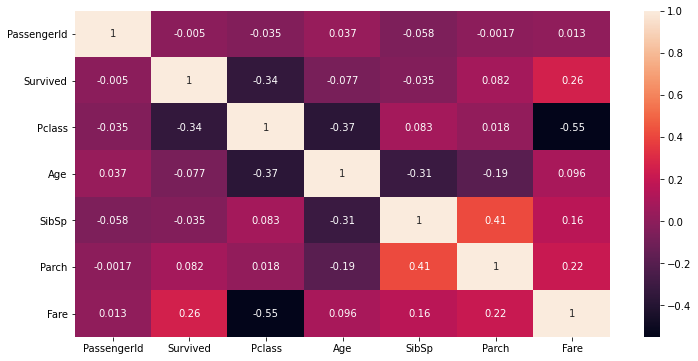

In [246]:
corr=data1.corr()
plt.figure(figsize=(12,6))
ax=sn.heatmap(corr,annot=True)
plt.show()

##### Observation:

        Only 'Fare' feature has some correlation with target feature 'Survived'

## Multi-variate Analysis with Target Feature

In [247]:
list_cols

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### 'Pclass' , 'Sex' & 'Survived'

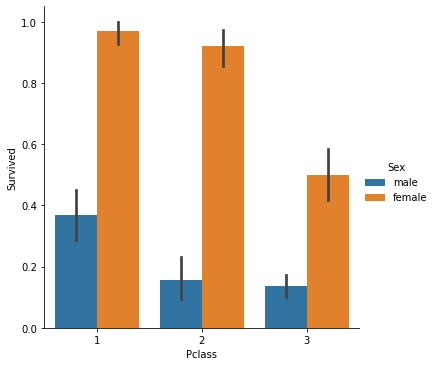

In [248]:
sn.catplot(x='Pclass',y='Survived',data=data1,kind='bar',hue='Sex')
plt.show()

##### Observation:

    The majority of survivers in any of the three classes are females.
    
    The proportion of survived people decreases as the Passenger Class decreases.

### 'Age', 'Sex' & 'Survived'

C:\Users\ashis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


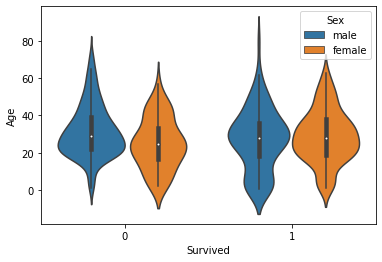

In [249]:
sn.violinplot(data1['Survived'],data1['Age'],hue=data1['Sex'])
plt.show()

##### Observation:

    Most of the male and female survivers were between age group 20 to 35.

### 'Age', 'Fare' & 'Survived'

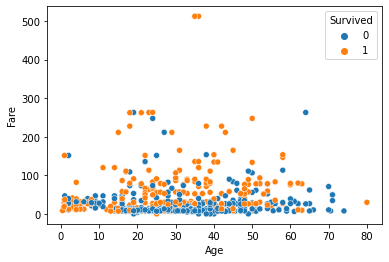

In [250]:
sn.scatterplot(x=data1['Age'],y=data1['Fare'],hue=data1['Survived'])
plt.show()

##### Observation:

    The travellers with high fare had high chances of survival. 

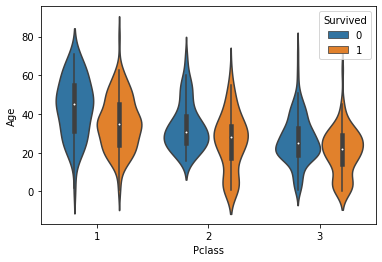

In [251]:
sn.violinplot(x=data1['Pclass'],y=data1['Age'],hue=data1['Survived'])
plt.show()

##### Observation:

        The travellers in 1st class were mostly senior adults and they were most of the survivers.

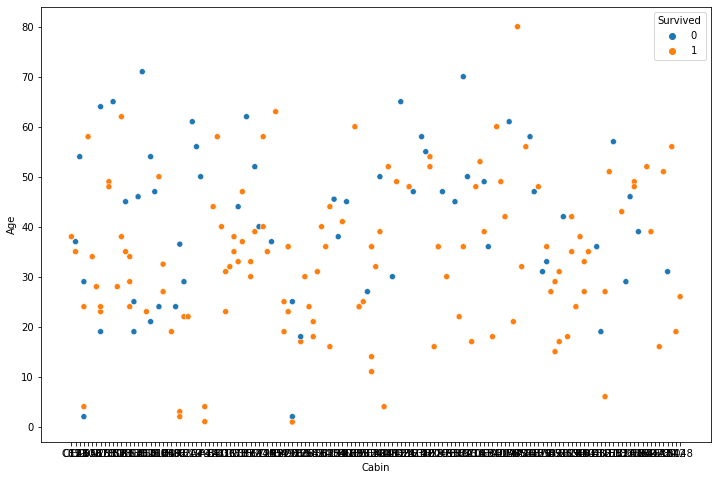

In [252]:
plt.figure(figsize=(12,8))
sn.scatterplot(x=data1['Cabin'],y=data1['Age'],hue=data1['Survived'])
plt.show()

##### Observation:

    There was no relation seen between class allocated onboard and age of people.

# Data Pre-Processing

### Extracting features from 'Name'

In [253]:
data1['Name'][0].split(',')[1].split('.')[0]

' Mr'

In [254]:
temp_title1=[]
temp_title1.clear()

for i in range(len(data1['Name'])):
    temp_title2=data1['Name'][i].split(',')[1].split('.')[0]
    temp_title1.append(temp_title2)
temp_title1

[' Mr',
 ' Mrs',
 ' Miss',
 ' Mrs',
 ' Mr',
 ' Mr',
 ' Mr',
 ' Master',
 ' Mrs',
 ' Mrs',
 ' Miss',
 ' Miss',
 ' Mr',
 ' Mr',
 ' Miss',
 ' Mrs',
 ' Master',
 ' Mr',
 ' Mrs',
 ' Mrs',
 ' Mr',
 ' Mr',
 ' Miss',
 ' Mr',
 ' Miss',
 ' Mrs',
 ' Mr',
 ' Mr',
 ' Miss',
 ' Mr',
 ' Don',
 ' Mrs',
 ' Miss',
 ' Mr',
 ' Mr',
 ' Mr',
 ' Mr',
 ' Mr',
 ' Miss',
 ' Miss',
 ' Mrs',
 ' Mrs',
 ' Mr',
 ' Miss',
 ' Miss',
 ' Mr',
 ' Mr',
 ' Miss',
 ' Mr',
 ' Mrs',
 ' Master',
 ' Mr',
 ' Mrs',
 ' Mrs',
 ' Mr',
 ' Mr',
 ' Miss',
 ' Mr',
 ' Miss',
 ' Master',
 ' Mr',
 ' Miss',
 ' Mr',
 ' Master',
 ' Mr',
 ' Master',
 ' Mrs',
 ' Mr',
 ' Miss',
 ' Mr',
 ' Mr',
 ' Miss',
 ' Mr',
 ' Mr',
 ' Mr',
 ' Mr',
 ' Mr',
 ' Mr',
 ' Master',
 ' Miss',
 ' Mr',
 ' Mr',
 ' Miss',
 ' Mr',
 ' Miss',
 ' Mrs',
 ' Mr',
 ' Mr',
 ' Miss',
 ' Mr',
 ' Mr',
 ' Mr',
 ' Mr',
 ' Mr',
 ' Mr',
 ' Mr',
 ' Mr',
 ' Mr',
 ' Mrs',
 ' Mr',
 ' Miss',
 ' Mr',
 ' Mr',
 ' Mr',
 ' Mr',
 ' Mr',
 ' Miss',
 ' Mr',
 ' Mr',
 ' Miss',
 ' Mr',
 ' Miss',
 ' Mr'

In [255]:
data1['Name'].shape

(891,)

In [256]:
len(temp_title1)

891

##### Observation

    We can extract the titles and analyse if there is any trend between title of person and survival rate.

In [257]:
data1.shape

(891, 12)

In [258]:
data1['Titles']=temp_title1

In [259]:
data1.shape

(891, 13)

In [260]:
data1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Titles
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [261]:
data1['Titles'].value_counts()

 Mr              517
 Miss            182
 Mrs             125
 Master           40
 Dr                7
 Rev               6
 Major             2
 Col               2
 Mlle              2
 Mme               1
 Ms                1
 Capt              1
 Don               1
 Jonkheer          1
 the Countess      1
 Lady              1
 Sir               1
Name: Titles, dtype: int64

In [262]:
pd.crosstab(columns=data1['Survived'],index=data1['Titles'])

Survived,0,1
Titles,,
Capt,1,0
Col,1,1
Don,1,0
Dr,4,3
Jonkheer,1,0
Lady,0,1
Major,1,1
Master,17,23
Miss,55,127


##### Observation:

    The %ge of survival was very less with 'Master' titles as well as 'Mr'.

# Handling of missing values

In [263]:
data1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Titles           0
dtype: int64

In [264]:
len(data1['Cabin'])

891

In [265]:
687/891*100

77.10437710437711

##### Observation:

    77% of the values of 'Cabin' are null, so we can drop this column.

In [266]:
data1.drop('Cabin',axis=1,inplace=True)

In [267]:
data1.shape

(891, 12)

C:\Users\ashis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


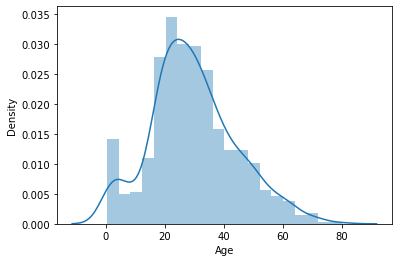

In [268]:
sn.distplot(data1['Age'])
plt.show()

In [269]:
data1['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

##### Observation:

    The mean of 'Age' column is higher than median, so the data is right skewed.
    
    We will replace the missing values with median of that column.

In [270]:
data1['Age'].fillna(data1['Age'].median(),inplace=True)

In [271]:
data1['Age'].describe()

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

##### Observation:

    After replacing the null values with median of 'Age' column, the mean and median is undisturbed.

In [272]:
# As we have extracted necessary feature from 'Name', we will drop it
data1.drop('Name',axis=1,inplace=True)

In [273]:
data1.shape

(891, 11)

In [274]:
data1['Embarked'].isnull().sum()

2

In [275]:
data1['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

##### Observation:

    As the most frequent Embarked station is Southampton, we will replace the 2 missing values with 'S'

In [276]:
data1['Embarked'].fillna('S',inplace=True)

In [277]:
data1['Embarked'].isnull().sum()

0

# Checking for outliers

In [278]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Embarked     891 non-null    object 
 10  Titles       891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


##### Observation:

     We will check for any outliers for our numerical features.

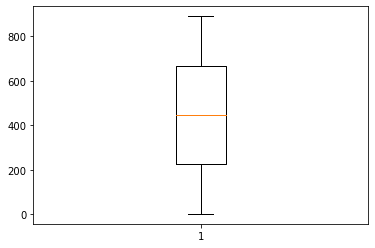

In [279]:
plt.boxplot(data1['PassengerId'])
plt.show()

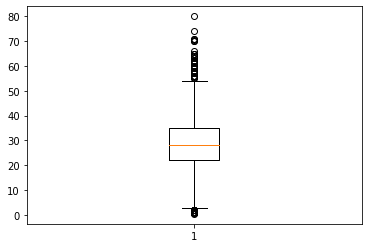

In [280]:
plt.boxplot(data1['Age'])
plt.show()

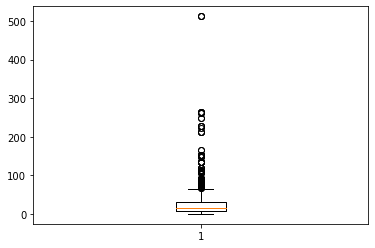

In [281]:
plt.boxplot(data1['Fare'])
plt.show()

##### Observation:

    The data points away from whiskers in 'Age' column are very close to whisker so we will not consider them outliers.
    
    In case of 'Fare', we see few outliers , we will remove it.

C:\Users\ashis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


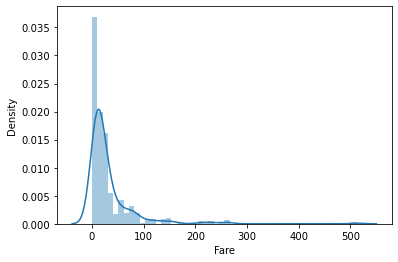

In [282]:
sn.distplot(data1['Fare'])
plt.show()

C:\Users\ashis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


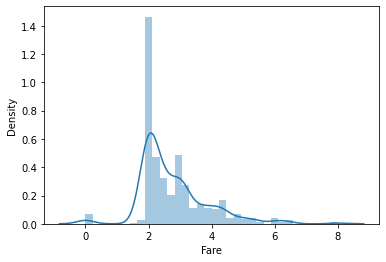

In [283]:
sn.distplot(np.cbrt(data1['Fare']))
plt.show()

##### Observation:

    To remove skewness and control the effect of outlier, we will use cuberoot transform on 'Fare'

In [284]:
data1['Fare']=np.cbrt(data1['Fare'])

### Label Encoding

In [285]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data1['Sex']=le.fit_transform(data1['Sex'])

In [286]:
data1['Survived']=le.fit_transform(data1['Survived'])

In [287]:
data1['Ticket']=le.fit_transform(data1['Ticket'])

In [288]:
data1['Embarked']=le.fit_transform(data1['Embarked'])

In [289]:
data1['Titles']=le.fit_transform(data1['Titles'])

In [290]:
data1.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Titles
0,1,0,3,1,22.0,1,0,523,1.935438,2,11
1,2,1,1,0,38.0,1,0,596,4.146318,0,12
2,3,1,3,0,26.0,0,0,669,1.993730,2,8
3,4,1,1,0,35.0,1,0,49,3.758647,2,12
4,5,0,3,1,35.0,0,0,472,2.004158,2,11


### Scaling

# Splitting the dataset into training and testing

In [291]:
data1

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Titles
0,1,0,3,1,22.00,1,0,523,1.935438,2,11
1,2,1,1,0,38.00,1,0,596,4.146318,0,12
2,3,1,3,0,26.00,0,0,669,1.993730,2,8
3,4,1,1,0,35.00,1,0,49,3.758647,2,12
4,5,0,3,1,35.00,0,0,472,2.004158,2,11
5,6,0,3,1,28.00,0,0,275,2.037485,1,11
6,7,0,1,1,54.00,0,0,85,3.729218,2,11
7,8,0,3,1,2.00,3,1,395,2.762205,2,7
8,9,1,3,0,27.00,0,2,344,2.232928,2,12
9,10,1,2,0,14.00,1,0,132,3.109675,0,12


In [292]:
x=data1.drop('Survived',axis=1)
y=data1['Survived']

In [293]:
print(x.shape)
print(y.shape)

(891, 10)
(891,)


# Finding the best random state

In [297]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    predrf=LR.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRs=i
print("Best Accuracy is ",maxAccu," at random state ",maxRs)

Best Accuracy is  0.8542372881355932  at random state  196


# Model Building

In [298]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=196)

In [300]:
#scaling the data
from sklearn.preprocessing import StandardScaler

s = StandardScaler()

x_train = s.fit_transform(x_train)
x_test = s.transform(x_test)

# Logistic Regression

In [302]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix , accuracy_score, roc_auc_score,roc_curve,classification_report

In [303]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

pred_lr = lr.predict(x_test)

print('Accuracy_score:',accuracy_score(y_test,pred_lr))

Accuracy_score: 0.8338983050847457


In [305]:
# cross validation
from sklearn.model_selection import cross_val_score

score_cv = cross_val_score(lr, x_train, y_train, cv=10)
print(score_cv)

print('\n The mean score we got from 10-Fold CV:',np.mean(score_cv))

[0.61666667 0.76666667 0.78333333 0.75       0.78333333 0.81666667
 0.84745763 0.84745763 0.83050847 0.6779661 ]

 The mean score we got from 10-Fold CV: 0.7720056497175142


In [306]:
#Classification Report

print(classification_report(y_test,pred_lr))

              precision    recall  f1-score   support

           0       0.85      0.88      0.87       182
           1       0.80      0.75      0.78       113

    accuracy                           0.83       295
   macro avg       0.83      0.82      0.82       295
weighted avg       0.83      0.83      0.83       295



# AUC Score

In [307]:
y_test_prob = lr.predict_proba(x_test)[:,1]

print('AUC:',roc_auc_score(y_test,y_test_prob))

AUC: 0.8997860546533113


# AUC Curve

In [308]:
fpr,tpr,thresholds = roc_curve(y_test,y_test_prob) #thresholds here are the cutoffs

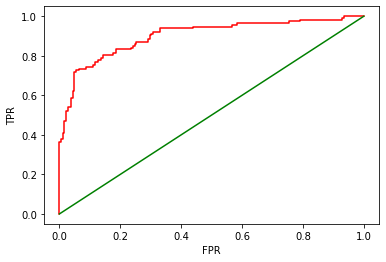

In [309]:
plt.plot(fpr,tpr,'r')
plt.plot(fpr,fpr,'g')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()